## CMPINF 2100 Week 13
### Measuring CLASSIFICATION PERFORMANCE - ROC Curve
In this video, you will larn what happens if the THRESHOLD which determines the classification is changed!
## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import statsmodels.formula.api as smf

## Read Data
Read data from last week.

In [3]:
df = pd.read_csv("../week_12/week_11_intro_binary_classification.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       115 non-null    float64
 1   y       115 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.9 KB


## Fit the model

In [5]:
fit_glm = smf.logit(formula="y ~ x", data=df).fit()

Optimization terminated successfully.
         Current function value: 0.560099
         Iterations 6


## Predict the training set

In [6]:
df_copy = df.copy()

In [7]:
df_copy["pred_probability"] = fit_glm.predict(df)

## Classify the predictions on the training set
Start with the DEFAULT or COMMON threshold of 50%

In [8]:
df_copy["pred_class"] = np.where(df_copy.pred_probability > 0.5, 1, 0)

## Accuracy

In [9]:
np.mean(df_copy.y == df_copy.pred_class)

0.6782608695652174

## Confusion Matrix

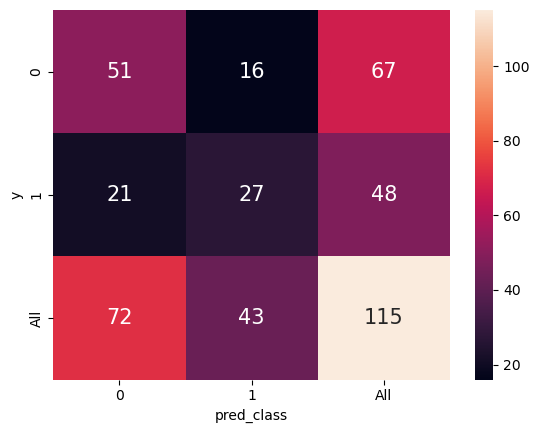

In [10]:
fig, ax = plt.subplots()

sns.heatmap(data=pd.crosstab(df_copy.y, df_copy.pred_class, margins=True),
            annot=True,
            annot_kws={"size": 15},
            fmt="d",
            ax=ax)

plt.show()

The confusion matrix counts can be easily calculated from a SKLEARN function.

In [11]:
from sklearn.metrics import confusion_matrix

In [34]:
TN, FP, FN, TP = confusion_matrix(df_copy.y.to_numpy(), df_copy.pred_class.to_numpy()).ravel()

We can calculate the ACCURACY from the CONFUSION MATRIX.

In [14]:
Accuracy = (TP + TN)/(TP + FP + TN + FN)

In [15]:
Accuracy

0.6782608695652174

We can calculate the SENSITIVITY or TRUE POSITIVE RATE (TPR)

In [17]:
Sensitivity = TP/(TP + FN)

In [18]:
Sensitivity

0.5625

We can calculate the SPECIFICITY or TRUE NEGATIVE RATE (TNR)

In [21]:
Specificity = TN/(TN + FP)

In [22]:
Specificity

0.7611940298507462

Or we can express the Specificity via the FPR.

In [23]:
FPR = 1 - Specificity

In [24]:
FPR

0.23880597014925375

The CONFUSION MATRIX and its summary stats DEPENDS on the ASSUMED THRESHOLD VALUE!!!

Changing the threshold may change the confusion matrix which means the Accuracy, Sensitivity, Specificity, and FPR may change for a model!

## Varing the threshold
### Increasing the threshold above 50%
Lets change the threshold from 50% to 75%. Now, we will only CLASSIFY the EVENT **IF** the predicted prob is GREATER than 75%.\
**IMPORTANT**: We do **NOT** need to refit the model when we CHANGE the threshold!!

In [25]:
df_copy.head()

,x,y,pred_probability,pred_class
0,-0.457429,1,0.270709,0
1,0.425948,1,0.513678,1
2,-0.784695,0,0.201258,0
3,-1.925209,0,0.061306,0
4,2.252617,1,0.901780,1


Lets add a new col which stores the CLASSIFICATION based on a higher threshold!

In [26]:
df_copy["pred_class_high_threshold"] = np.where(df_copy.pred_probability > .75, 1, 0)

In [27]:
df_copy.head()

,x,y,pred_probability,pred_class,pred_class_high_threshold
0,-0.457429,1,0.270709,0,0
1,0.425948,1,0.513678,1,0
2,-0.784695,0,0.201258,0,0
3,-1.925209,0,0.061306,0,0
4,2.252617,1,0.901780,1,1


The confusion matrix therefore changes!!!

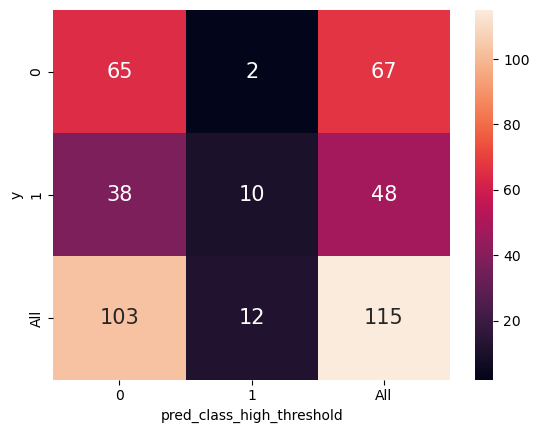

In [28]:
fig, ax = plt.subplots()

sns.heatmap(data=pd.crosstab(df_copy.y, df_copy.pred_class_high_threshold, margins=True),
            annot=True,
            annot_kws={"size": 15},
            fmt="d",
            ax=ax)

plt.show()

Lets directly compare the CONFUSION MATRICES between the two thresholds.

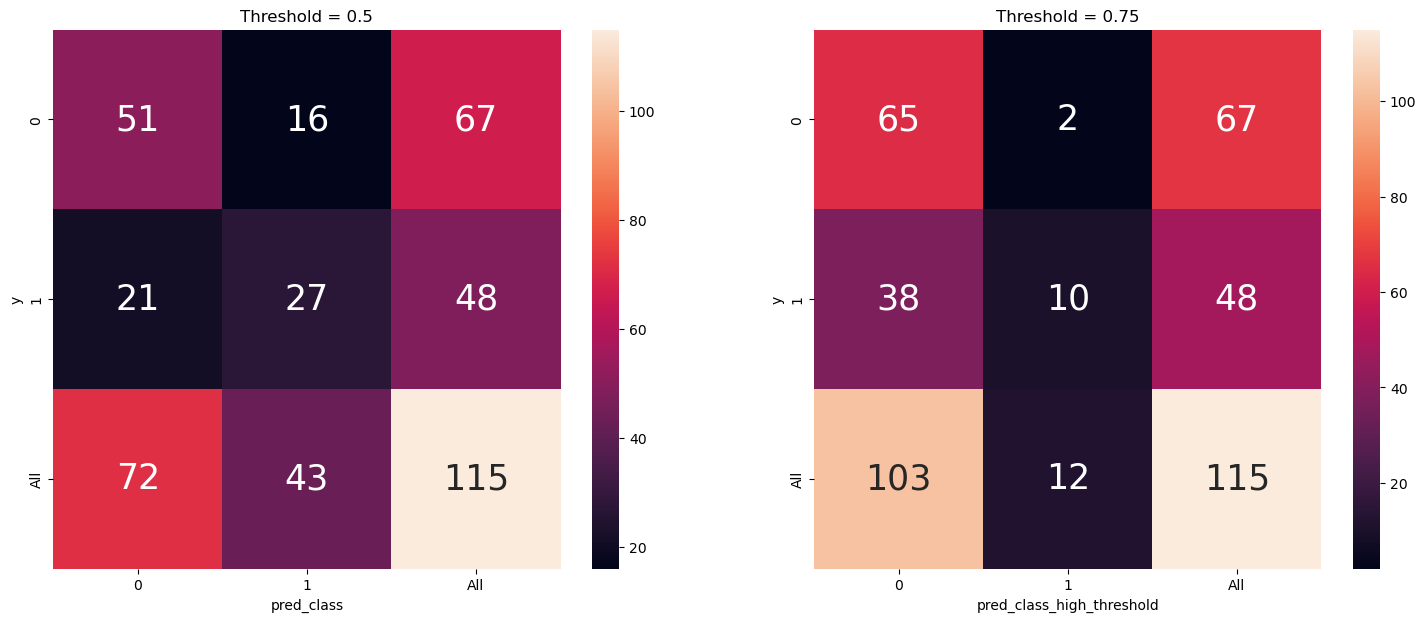

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(18,7))

sns.heatmap(data=pd.crosstab(df_copy.y, df_copy.pred_class, margins=True),
            annot=True,
            annot_kws={"size": 25},
            fmt="d",
            ax=ax[0])
ax[0].set_title("Threshold = 0.5")

sns.heatmap(data=pd.crosstab(df_copy.y, df_copy.pred_class_high_threshold, margins=True),
            annot=True,
            annot_kws={"size": 25},
            fmt="d",
            ax=ax[1])

ax[1].set_title("Threshold = 0.75")


plt.show()

In [32]:
np.mean(df_copy.y == df_copy.pred_class_high_threshold)

0.6521739130434783

Lets calculate the Sensitivity, Specificity and FPR for the HIGHER threshold.

In [35]:
TN_higher, FP_higher, FN_higher, TP_higher = confusion_matrix(df_copy.y.to_numpy(), df_copy.pred_class_high_threshold.to_numpy()).ravel()

In [36]:
Accuracy_higher = (TP_higher + TN_higher)/(TP_higher + TN_higher + FP_higher + FN_higher)

In [37]:
Accuracy_higher

0.6521739130434783

In [38]:
Sensitivity_higher = TP_higher/(TP_higher + FN_higher)

In [39]:
Sensitivity_higher

0.20833333333333334

RAISING THE THRESHOLD DECREASES THE SENSITIVITY!!!!

In [40]:
Specificity_higher = TN_higher/(TN_higher + FP_higher)

In [41]:
Specificity_higher

0.9701492537313433

RAISING THE THRESHOLD INCREASES THE SPECIFICITY!!!!

In [42]:
FPR_higher = 1 - Specificity_higher

In [43]:
FPR_higher

0.02985074626865669

RAISING the threshold makes it HARDER to classify the event, meaning the FPR DECREASES!!!

### Decrease the threshold below 50%
Lets change the THRESHOLD from 50% to 25% and classify by comparing the predicted prob to just 25%!

In [45]:
df_copy["pred_class_low_threshold"] = np.where(df_copy.pred_probability > .25, 1, 0)

In [47]:
df_copy

,x,y,pred_probability,pred_class,pred_class_high_threshold,pred_class_low_threshold
0,-0.457429,1,0.270709,0,0,1
1,0.425948,1,0.513678,1,0,1
2,-0.784695,0,0.201258,0,0,0
3,-1.925209,0,0.061306,0,0,0
4,2.252617,1,0.901780,1,1,1
...,...,...,...,...,...,...
110,-0.791672,0,0.199933,0,0,0
111,0.452238,1,0.521449,1,0,1
112,0.535510,1,0.545976,1,0,1
113,-0.532739,0,0.253472,0,0,1


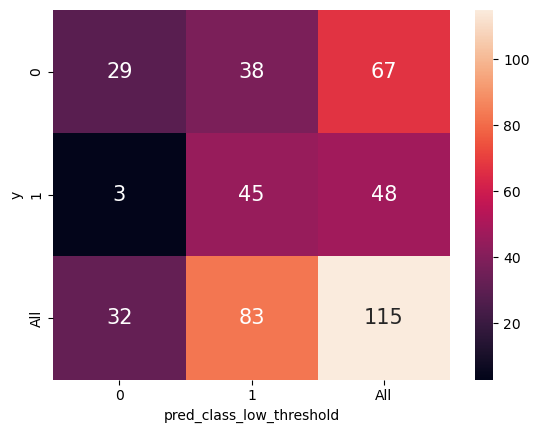

In [48]:
fig, ax = plt.subplots()

sns.heatmap(data=pd.crosstab(df_copy.y, df_copy.pred_class_low_threshold, margins=True),
            annot=True,
            annot_kws={"size": 15},
            fmt="d",
            ax=ax)

plt.show()

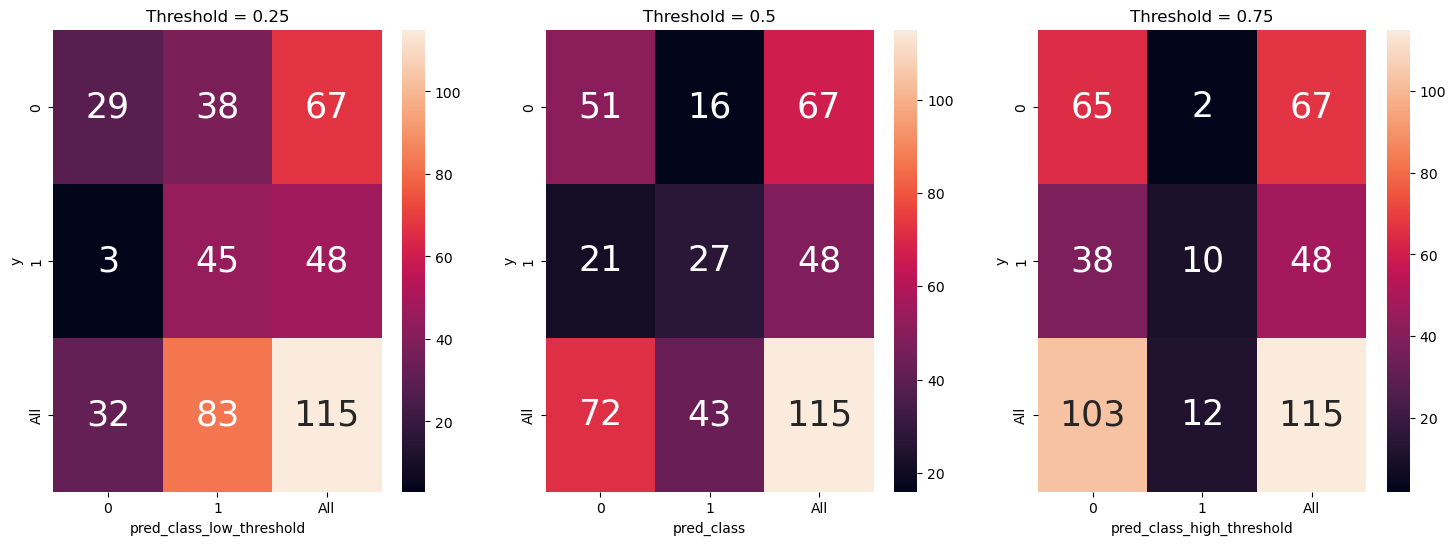

In [51]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(data=pd.crosstab(df_copy.y, df_copy.pred_class_low_threshold, margins=True),
            annot=True,
            annot_kws={"size": 25},
            fmt="d",
            ax=ax[0])

ax[0].set_title("Threshold = 0.25")

sns.heatmap(data=pd.crosstab(df_copy.y, df_copy.pred_class, margins=True),
            annot=True,
            annot_kws={"size": 25},
            fmt="d",
            ax=ax[1])
ax[1].set_title("Threshold = 0.5")

sns.heatmap(data=pd.crosstab(df_copy.y, df_copy.pred_class_high_threshold, margins=True),
            annot=True,
            annot_kws={"size": 25},
            fmt="d",
            ax=ax[2])

ax[2].set_title("Threshold = 0.75")

plt.show()

Lets calc the confusion matrix combinations counts directly.

In [52]:
TN_lower, FP_lower, FN_lower, TP_lower = confusion_matrix(df_copy.y.to_numpy(), df_copy.pred_class_low_threshold.to_numpy()).ravel()

In [53]:
Accuracy_lower = (TP_lower + TN_lower)/(TP_lower + TN_lower + FP_lower + FN_lower)

In [54]:
Accuracy_lower

0.6434782608695652

In [55]:
Sensitivity_lower = TP_lower/(TP_lower + FN_lower)

In [56]:
Sensitivity_lower

0.9375

LOWERING THE THRESHOLD INCREASES THE SENSITIVITY

In [57]:
Specificity_lower = TN_lower/(TN_lower + FP_lower)

In [58]:
Specificity_lower

0.43283582089552236

LOWERING THE THRESHOLD DECREASES THE SPECIFICITY

In [59]:
FPR_lower = 1 - Specificity_lower

In [60]:
FPR_lower

0.5671641791044777

LOWERING THRESHOLD INCREASES FPR!!

## WHY WOULD YOU WANT TO CHANGE THE THRESHOLD??
Why would you want to try a threshold DIFFERENT from 50%??\
It all depends on WHICH ERROR IS WORSE??

## Graphically visualizing the impact of the different thresholds
We will visualize the Sensitivity or TPR and the FPR for different thresholds.
This graphic is known as the **ROC curve** or **Receiver Operating Characteristic**.

In [62]:
my_roc = pd.DataFrame({"tpr": [Sensitivity_lower, Sensitivity, Sensitivity_higher],
                      "Specificity": [Specificity_lower, Specificity, Specificity_higher],
                      "fpr": [FPR_lower, FPR, FPR_higher],
                      "threshold": [0.25, .5, 0.75],
                      })

In [63]:
my_roc

,tpr,Specificity,fpr,threshold
0,0.937500,0.432836,0.567164,0.25
1,0.562500,0.761194,0.238806,0.50
2,0.208333,0.970149,0.029851,0.75


Create a scatterplot between the TPR and FPR.

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


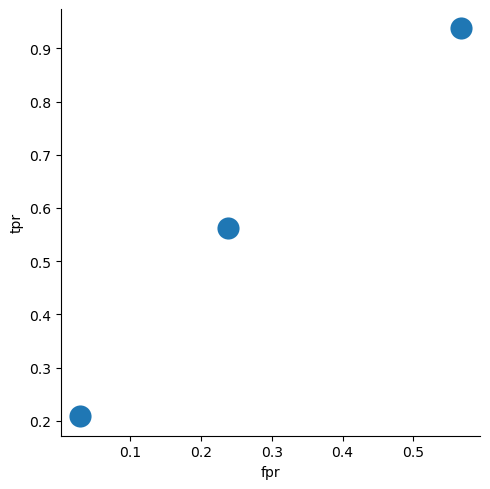

In [66]:
sns.relplot(data=my_roc, x="fpr", y="tpr", s=300)

plt.show()

The THRESHOLD is actually CONTROLLING the TPR and FPR!!

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


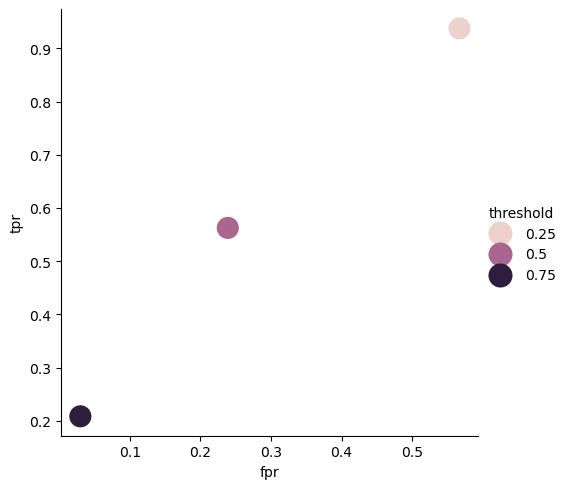

In [67]:
sns.relplot(data=my_roc, x="fpr", y="tpr", hue="threshold", s=300)

plt.show()

Changing thresholds is all about tradeoffs!!

The ROC Curve is tough to look at with just 3 threshold values...INSTEAD we want to try **MANY** different thresholds from near 0 to near 1!!!

You do not need to do that manually, instead SKLEARN has a function to create if for you.

In [68]:
from sklearn.metrics import roc_curve

The roc_curve() function that does **NOT** require CLASSIFICATIONS!!! The function needs the model predicted EVENT PROBABILITY and IT will try out MANY DIFFERENT thresholds for you! The function will therefore CLASSIFY for many thresholds and calculate the TPR and FPR!!!

In [69]:
fpr_values, tpr_values, threshold_values = roc_curve(df_copy.y.to_numpy(), df_copy.pred_probability.to_numpy())

Lets visualize the ROC curve as a STEP WISE line chart.

Lets make it using MATPLOTLIB directly.

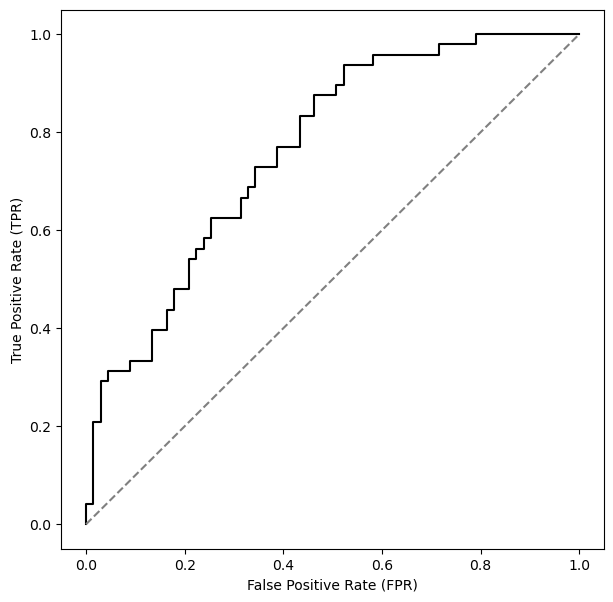

In [76]:
fig, ax = plt.subplots(figsize=(7,7))

ax.plot(fpr_values, tpr_values, color="k")
ax.plot([0,1], [0,1], color="grey", linestyle="--")
ax.set_xlabel("False Positive Rate (FPR)")
ax.set_ylabel("True Positive Rate (TPR)")

plt.show()

You don't want your model close to the 45 degree line, this means that the FPR = TPR and at that point your model is guessing.

The ROC Curve can be CONVERTED to QUANTIFIABLE number by calcuating the AREA UNDER the CURVE (AUC).

In [77]:
from sklearn.metrics import roc_auc_score

In [78]:
roc_auc_score(df_copy.y.to_numpy(), df_copy.pred_probability.to_numpy())

0.763681592039801

The IDEAL ROC AUC is 1 and the WORST is 0.5.

## Summary

The confusion matrix and ALL of its summary statistics, Accuracy, Sensitivity, Specificity, and FPR require a THRESHOLD to be assumed!!

Once you assume a threshold you can convert the PREDICTED PROBABILITY into a CLASSIFICATION.

You can meausre the performance against the KNOWN observed output!!!

However, you can change the classification by CHANGING the threshold!!!

From a performance perspecitive, INCREASING the TRESHOLD improves certain metrics at the expense of other metrics! Likewise, DECREASING THE THRESHOLDS hurt metrics while improving others! The ROC Curve is a GRAPHICAL TOOL to represent the **TRADE OFF** between the metrics at all possible threshold values!

The ROC Curve can be quantified by the ROC AUC.